# ML Week 2 - Exploratory Data Analysis (EDA)
##### Let's attack some heavy-duty archaeological data! Note that there are a huge number of different steps you may need to do in the data "wrangling" process. They will vary imensely from one dataset to another.

##### Note: With bigger files some of these cells can take a few minutes to execute. Be patient ;)

### Datset
We will be using a Zooarchaeology Dataset from several Epipaleolithic - Chalcolithic sites in Anatolia.

The associated publication is:

Arbuckle et al. 2017, https://doi.org/10.34894/WT8CSG

You can download the dataset here (159 Mb):

https://dataverse.nl/dataset.xhtml?persistentId=doi:10.34894/WT8CSG

## Importing Common Packages
##### These are the packages we will be using for this exercise

In [1]:
import pandas as pd
import seaborn as sns

## Import Data and Examine DataFrame
##### Let's look at the first few rows and see what we have

In [2]:
# Let's read in our data
filepath = "./"  # This can help if the file is in a different folder. Here we just use "./" which means "the file is in this folder"
filename = "EOL-CDC Primary Zooarchaeology data.csv"

df_raw = pd.read_csv(filepath + filename)

df_raw.head()

C:\Users\re72fam\AppData\Local\Temp\ipykernel_27416\819371253.py:5: DtypeWarning: Columns (17,18,19,20,21,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(filepath + filename)


,URI,Label,Project,Project URI,Item Category,Last Updated,Authorship,Latitude (WGS-84),Longitude (WGS-84),Geospatial note,...,Has Biological Taxonomy [Source],Has fusion character [Proximal URI],Has fusion character [Proximal Label],Has fusion character [Proximal Source],Has fusion character [Distal URI],Has fusion character [Distal Label],Has fusion character [Distal Source],Has physiological sex determination [URI],Has physiological sex determination [Label],Has physiological sex determination [Source]
0,http://opencontext.org/subjects/CC80A04F-455E-...,Bone 9290,Çatalhöyük Area TP Zooarchaeology,http://opencontext.org/projects/02594C48-7497-...,Animal Bone,2014-07-23,Arek Marciniak; Kamilla Pawlowska,37.668196,32.827191,Best available location data,...,Sheep-size (medium dog to medium sheep),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://opencontext.org/subjects/208259AB-BAC9-...,Bone 9291,Çatalhöyük Area TP Zooarchaeology,http://opencontext.org/projects/02594C48-7497-...,Animal Bone,2014-07-23,Arek Marciniak; Kamilla Pawlowska,37.668196,32.827191,Best available location data,...,Sheep-size (medium dog to medium sheep),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://opencontext.org/subjects/34C7E413-4807-...,Bone 9292,Çatalhöyük Area TP Zooarchaeology,http://opencontext.org/projects/02594C48-7497-...,Animal Bone,2014-07-22,Arek Marciniak; Kamilla Pawlowska,37.668196,32.827191,Best available location data,...,Sheep-size (medium dog to medium sheep),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,http://opencontext.org/subjects/43E9607D-106A-...,Bone 9293,Çatalhöyük Area TP Zooarchaeology,http://opencontext.org/projects/02594C48-7497-...,Animal Bone,2014-07-22,Arek Marciniak; Kamilla Pawlowska,37.668196,32.827191,Best available location data,...,Sheep-size (medium dog to medium sheep),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,http://opencontext.org/subjects/A61DE94D-CDC1-...,Bone 9294,Çatalhöyük Area TP Zooarchaeology,http://opencontext.org/projects/02594C48-7497-...,Animal Bone,2014-07-23,Arek Marciniak; Kamilla Pawlowska,37.668196,32.827191,Best available location data,...,Sheep-size (medium dog to medium sheep),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Taking a look at the column names

In [3]:
# Let's see our columns
columns = df_raw.columns
for i in range(len(columns)):
    print(str(i) + ' ' + columns[i])

0 URI
1 Label
2 Project
3 Project URI
4 Item Category
5 Last Updated
6 Authorship
7 Latitude (WGS-84)
8 Longitude (WGS-84)
9 Geospatial note
10 Early Date (BCE/CE)
11 Late Date (BCE/CE)
12 Context URI
13 Context (1)
14 Context (2)
15 Context (3)
16 Context (4)
17 Context (5)
18 Context (6)
19 Context (7)
20 Context (8)
21 Context (9)
22 Has anatomical identification [URI]
23 Has anatomical identification [Label]
24 Has anatomical identification [Source]
25 Has Biological Taxonomy [URI]
26 Has Biological Taxonomy [Label]
27 Has Biological Taxonomy [Source]
28 Has fusion character [Proximal URI]
29 Has fusion character [Proximal Label]
30 Has fusion character [Proximal Source]
31 Has fusion character [Distal URI]
32 Has fusion character [Distal Label]
33 Has fusion character [Distal Source]
34 Has physiological sex determination [URI]
35 Has physiological sex determination [Label]
36 Has physiological sex determination [Source]


## Dropping columns we don't need

In [4]:
# We can drop many of these! The first 4 aren't useful, and also anything to do with "URI" (this is just a hyperlink)

columns_to_drop = [df_raw.columns[i] for i in [0,1,2,3,5,6,9,12,22,25,28,25,28,31,34]]
df_raw = df_raw.drop(columns=columns_to_drop)

In [5]:
# Let's now look at the unique items for the remaining columns

for column in df_raw.columns:
    print('-------')
    print(column)
    print("Set size: " + str(len(df_raw[column].unique())))
    print(df_raw[column].unique())

-------
Item Category
Set size: 1
['Animal Bone']
-------
Latitude (WGS-84)
Set size: 15
[37.668196   37.84779    37.666389   37.6675     37.33000183 37.077589
 40.267036   37.08335    38.46       37.929167   37.759171   37.35
 40.468303   37.493962   37.49432   ]
-------
Longitude (WGS-84)
Set size: 15
[32.827191   34.611821   32.8225     32.828333   37.04399872 30.5708
 29.602058   30.579436   27.35       27.359444   31.681153   31.933333
 29.309099   33.016928   33.018551  ]
-------
Early Date (BCE/CE)
Set size: 23
[ -6200  -5900  -6100  -7000  -6500  -7400  -7200 -17850 -11900 -12500
 -17840  -6000  -7040  -6750  -7500  -5500  -5600  -5450  -5700  -5800
  -2400  -2700  -6700]
-------
Late Date (BCE/CE)
Set size: 19
[ -6000  -5500  -5800  -5900  -5600  -6500  -6200  -7000 -17050 -11700
 -12100 -10950  -5660  -5700  -6250  -5400  -2000  -2400  -7500]
-------
Context (1)
Set size: 1
['Turkey']
-------
Context (2)
Set size: 12
['Çatalhöyük' 'Köşk Höyük' 'Domuztepe' 'Karain B Cave' 'Bar

In [6]:
# 'Item Category is always just "Animal Bone", Context (1) is always "Turkey", and Contexts 6,7,8 also don'T seem especially helpful

df_raw = df_raw.drop(columns=['Item Category', 'Context (1)', 'Context (6)', 'Context (7)', 'Context (8)'])

In [7]:
# We can also see what percentage of the columns are empty (NaN values) using the "isna" method

length = len(df_raw)

for column in df_raw.columns:
    percent_NaN = df_raw[column].isna().sum()/length*100
    print('-------')
    print(column)
    print(percent_NaN)

-------
Latitude (WGS-84)
0.0
-------
Longitude (WGS-84)
0.0
-------
Early Date (BCE/CE)
0.0
-------
Late Date (BCE/CE)
0.0
-------
Context (2)
0.0
-------
Context (3)
0.0
-------
Context (4)
5.173825839879659
-------
Context (5)
34.273775697810464
-------
Context (9)
99.35316730737088
-------
Has anatomical identification [Label]
1.3981280294166807
-------
Has anatomical identification [Source]
0.014206919605549057
-------
Has Biological Taxonomy [Label]
2.18076215945178
-------
Has Biological Taxonomy [Source]
0.004596356342971754
-------
Has fusion character [Proximal Label]
90.05097777034933
-------
Has fusion character [Proximal Source]
90.05097777034933
-------
Has fusion character [Distal Label]
89.79191041283637
-------
Has fusion character [Distal Source]
89.79191041283637
-------
Has physiological sex determination [Label]
99.48771519304697
-------
Has physiological sex determination [Source]
85.64683269262912


In [8]:
df_raw.shape

(239320, 19)

In [9]:
# THe last 6 elements are almost entirely NaN.
# Note that these may be important for specific applications, but as we are doing general EDA lets drop them

columns = df_raw.columns
columns_to_keep = list(columns)[0:-6]
columns_to_keep_with_sex = [columns[x] for x in [0,1,2,3,4,5,6,7,8,9,10,11,12,18]]
df_raw_with_sex = df_raw[columns_to_keep_with_sex]
df_raw = df_raw[columns_to_keep]

In [10]:
# So is "Context (9)"

df_raw = df_raw.drop(columns=["Context (9)"])
df_raw_with_sex = df_raw_with_sex.drop(columns=["Context (9)"])

In [11]:
# Now we're getting somewhere! We have 12 remainng columns that seem like they could actually be useful.

df_raw.head()

,Latitude (WGS-84),Longitude (WGS-84),Early Date (BCE/CE),Late Date (BCE/CE),Context (2),Context (3),Context (4),Context (5),Has anatomical identification [Label],Has anatomical identification [Source],Has Biological Taxonomy [Label],Has Biological Taxonomy [Source]
0,37.668196,32.827191,-6200,-6000,Çatalhöyük,Mound East,Area TP,Unit 10902,bone,Long bone,Mammalia,Sheep-size (medium dog to medium sheep)
1,37.668196,32.827191,-6200,-6000,Çatalhöyük,Mound East,Area TP,Unit 10902,bone,Long bone,Mammalia,Sheep-size (medium dog to medium sheep)
2,37.668196,32.827191,-6200,-6000,Çatalhöyük,Mound East,Area TP,Unit 10902,bone,Long bone,Mammalia,Sheep-size (medium dog to medium sheep)
3,37.668196,32.827191,-6200,-6000,Çatalhöyük,Mound East,Area TP,Unit 10902,bone,Long bone,Mammalia,Sheep-size (medium dog to medium sheep)
4,37.668196,32.827191,-6200,-6000,Çatalhöyük,Mound East,Area TP,Unit 10902,bone,Long bone,Mammalia,Sheep-size (medium dog to medium sheep)


## Engineering a New Column
Now that we've removed a lot of the useless columns, let's zoom in on the interesting ones

In [12]:
# How about we combine the "Early Date" and "Late Date" columns into an average date column (Called simply "Date")
# We can then drop the old columns
# Note that going from a date range to a simple average is a bit sketchy in archaeology, but remember this is just a first exploration

df_raw['Date'] = df_raw[['Early Date (BCE/CE)','Late Date (BCE/CE)']].mean(axis=1)
df_raw = df_raw.drop(columns=['Early Date (BCE/CE)','Late Date (BCE/CE)'])

df_raw_with_sex['Date'] = df_raw_with_sex[['Early Date (BCE/CE)','Late Date (BCE/CE)']].mean(axis=1)
df_raw_with_sex = df_raw_with_sex.drop(columns=['Early Date (BCE/CE)','Late Date (BCE/CE)'])

In [13]:
# Let's study which animals the bones came from.
# Before doing this it may be useful to rename the "Has Biological Taxonomy [Label]" to "Animal" (that's a bit shorter to type)

df_raw = df_raw.rename(columns={'Has Biological Taxonomy [Label]':'Animal'})
df_raw_with_sex = df_raw_with_sex.rename(columns={'Has Biological Taxonomy [Label]':'Animal'})

In [14]:
# Let's see how many bones have been found for different animals (or genuses)

from collections import Counter
Counter(df_raw['Animal'].tolist())

Counter({'Mammalia': 100604,
         'Sheep/goat': 58941,
         'Ovis': 11194,
         'Artiodactyla': 10281,
         'Bos taurus Linnaeus, 1758': 8206,
         'Bos': 7941,
         'Sus scrofa domesticus': 7599,
         nan: 5219,
         'Equidae': 3107,
         'Mytilus galloprovincialis': 2428,
         'Dama dama (Linnaeus, 1758)': 2337,
         'Capra': 2138,
         'Ovis aries Linnaeus, 1758': 2135,
         'Capra hircus Linnaeus, 1758': 2116,
         'Cervidae': 1583,
         'Ovis orientalis': 1531,
         'Sus scrofa': 1340,
         'Homo sapiens Linnaeus, 1758': 1072,
         'dog': 849,
         'Sus': 831,
         'Unio': 799,
         'Aves': 700,
         'Capra aegagrus': 629,
         'Cervus elaphus Linnaeus, 1758': 366,
         'Vulpes': 350,
         'Capreolus': 344,
         'Carnivora': 311,
         'Lepus': 293,
         'Bos primigenius': 290,
         'Vulpes vulpes (Linnaeus, 1758)': 252,
         'Canidae': 240,
         'Cerastoderma

## Let's Study Cows!
Why not look at the "Bos" bones (related to cows)

In [15]:
# We notice there are some duplicate labels - let's replace them with simply 'Bos'

df_raw.loc[df_raw['Animal'] == 'Bos taurus Linnaeus, 1758', 'Animal'] = 'Bos'
df_raw.loc[df_raw['Animal'] == 'Bos primigenius', 'Animal'] = 'Bos'

In [16]:
# Now if we check we see all the Bos have been combined

Counter(df_raw['Animal'].tolist())

Counter({'Mammalia': 100604,
         'Sheep/goat': 58941,
         'Bos': 16437,
         'Ovis': 11194,
         'Artiodactyla': 10281,
         'Sus scrofa domesticus': 7599,
         nan: 5219,
         'Equidae': 3107,
         'Mytilus galloprovincialis': 2428,
         'Dama dama (Linnaeus, 1758)': 2337,
         'Capra': 2138,
         'Ovis aries Linnaeus, 1758': 2135,
         'Capra hircus Linnaeus, 1758': 2116,
         'Cervidae': 1583,
         'Ovis orientalis': 1531,
         'Sus scrofa': 1340,
         'Homo sapiens Linnaeus, 1758': 1072,
         'dog': 849,
         'Sus': 831,
         'Unio': 799,
         'Aves': 700,
         'Capra aegagrus': 629,
         'Cervus elaphus Linnaeus, 1758': 366,
         'Vulpes': 350,
         'Capreolus': 344,
         'Carnivora': 311,
         'Lepus': 293,
         'Vulpes vulpes (Linnaeus, 1758)': 252,
         'Canidae': 240,
         'Cerastoderma edule (Linnaeus, 1758)': 216,
         'Equidae; Equus': 210,
         'Vul

## Studying the date spread

In [17]:
# Let's make a dataframe for our cows
# We can also see the different dates that the bones were attributed to

df_cow = df_raw[df_raw['Animal'] == 'Bos']
df_cow = df_cow.drop(columns=['Animal'])
df_cow['Date'].unique()

array([ -6100.,  -5850.,  -6000.,  -5750.,  -6750.,  -6350.,  -6700.,
        -7200.,  -6800.,  -7100., -17450.,  -6250.,  -5830.,  -6370.,
        -6500.,  -5800.,  -5450.,  -5500.,  -5650.,  -5425.,  -5900.,
        -2550.,  -2200., -10000.])

(-8000.0, -4000.0)

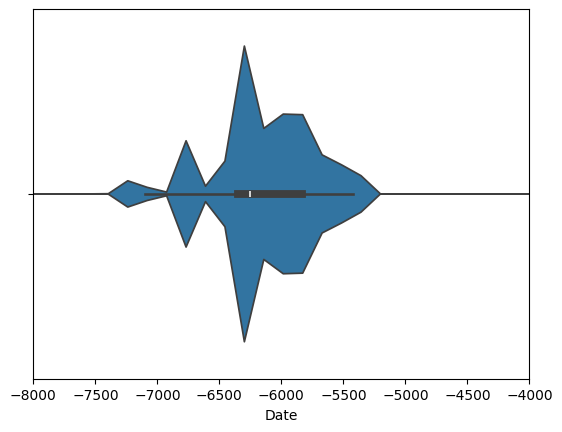

In [18]:
# A violin plot is a nice way of seeing where most cow bones have been found
ax = sns.violinplot(x=df_cow["Date"])
ax.set_xlim(-8000,-4000)

## Correlating Dates and location
We can now try to combine different columns for more interesting insights

In [19]:
# Let's try to combine the dates and the locations
# To do this, let's first simplify the names of the latitude and logitude columns

df_cow = df_cow.rename(columns={'Latitude (WGS-84)':'Lat', 'Longitude (WGS-84)':'Lon'})

In [20]:
# Context (2) is the region the bones were found.
# Let's make a new dataframe that contains the latitude, longitude, and mean date for the bones found (and also the count)

final_df = df_cow.groupby('Context (2)').agg({'Lat':'first','Lon':'first','Date':['mean','count']})
final_df

Lat        Lon          Date      
                    first      first          mean count
Context (2)                                             
Barcın Höyük    40.267036  29.602058  -6250.000000  1277
Domuztepe       37.330002  37.043999  -6000.000000  2041
Erbaba Höyük    37.759171  31.681153  -6250.000000   804
Ilıpınar        40.468303  29.309099  -5617.627048  3601
Karain B Cave   37.077589  30.570800 -17450.000000     4
Köşk Höyük      37.847790  34.611821  -5850.000000   492
Pınarbaşı       37.493962  33.016928  -6530.991736   242
Ulucak          38.460000  27.350000  -6205.840637  1255
Çatalhöyük      37.668196  32.827191  -6442.629699  6438
Çukuriçi Höyük  37.929167  27.359444  -6100.000000   283

In [21]:
# The count shows us there is one site with only 4 bones. Let's drop any site with fewer than 100 bones

final_df = final_df.drop(final_df[final_df['Date']['count'] < 100].index)

<Axes: xlabel='Lon', ylabel='Lat'>

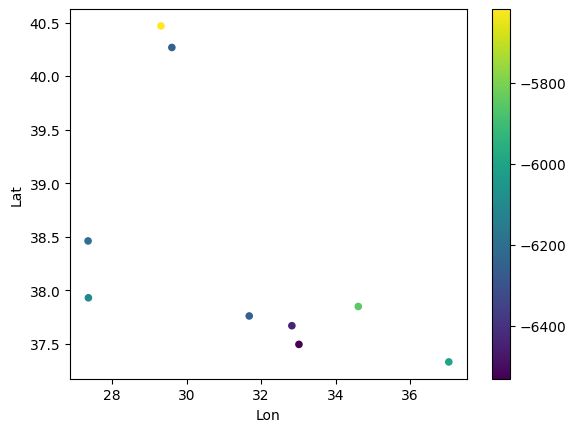

In [22]:
# Now let's plot the site locations and colour code them based on the mean date of the cow bones

final_df.plot.scatter(x='Lon', y='Lat', c=final_df['Date']['mean'], colormap='viridis')

If we superimpose this on a map of turkey (scaled to the same coordinates) we're starting to get somewhere!

<div>
<img src="Turkey.png" width="700"/>
</div>

# Exercises

### Exercise 1
Attempt the same thing with horses (Equidae). Note that there are again multiple labels in the Animal column for horses. Be sure to rename them all Equidae

In [23]:
# Let's find the multiple labels

from collections import Counter
Counter(df_raw['Animal'].tolist())

Counter({'Mammalia': 100604,
         'Sheep/goat': 58941,
         'Bos': 16437,
         'Ovis': 11194,
         'Artiodactyla': 10281,
         'Sus scrofa domesticus': 7599,
         nan: 5219,
         'Equidae': 3107,
         'Mytilus galloprovincialis': 2428,
         'Dama dama (Linnaeus, 1758)': 2337,
         'Capra': 2138,
         'Ovis aries Linnaeus, 1758': 2135,
         'Capra hircus Linnaeus, 1758': 2116,
         'Cervidae': 1583,
         'Ovis orientalis': 1531,
         'Sus scrofa': 1340,
         'Homo sapiens Linnaeus, 1758': 1072,
         'dog': 849,
         'Sus': 831,
         'Unio': 799,
         'Aves': 700,
         'Capra aegagrus': 629,
         'Cervus elaphus Linnaeus, 1758': 366,
         'Vulpes': 350,
         'Capreolus': 344,
         'Carnivora': 311,
         'Lepus': 293,
         'Vulpes vulpes (Linnaeus, 1758)': 252,
         'Canidae': 240,
         'Cerastoderma edule (Linnaeus, 1758)': 216,
         'Equidae; Equus': 210,
         'Vul

In [24]:
# Let's change them all to Equidae
df_raw.loc[df_raw['Animal'] == 'Equidae; Equus', 'Animal'] = 'Equidae'
df_raw.loc[df_raw['Animal'] == 'Equus hydruntinus', 'Animal'] = 'Equidae'
df_raw.loc[df_raw['Animal'] == 'Equus hemionus Pallas, 1775', 'Animal'] = 'Equidae'
df_raw.loc[df_raw['Animal'] == 'Equus caballus Linnaeus, 1758', 'Animal'] = 'Equidae'

# Drop the Animal column now
df_horse = df_raw[df_raw['Animal'] == 'Equidae']
df_horse = df_horse.drop(columns=['Animal'])

# Rename to Lat and Lon
df_horse = df_horse.rename(columns={'Latitude (WGS-84)':'Lat', 'Longitude (WGS-84)':'Lon'})

# Finally apply the grouping
final_df_horse = df_horse.groupby('Context (2)').agg({'Lat':'first','Lon':'first','Date':['mean','count']})
final_df_horse


Lat        Lon         Date      
                  first      first         mean count
Context (2)                                          
Domuztepe     37.330002  37.043999 -6000.000000     2
Erbaba Höyük  37.759171  31.681153 -6250.000000    17
Ilıpınar      40.468303  29.309099 -5820.000000     5
Köşk Höyük    37.847790  34.611821 -5850.000000  1684
Pınarbaşı     37.493962  33.016928 -6402.392344   209
Çatalhöyük    37.668196  32.827191 -6560.955928  1611

<Axes: xlabel='Lon', ylabel='Lat'>

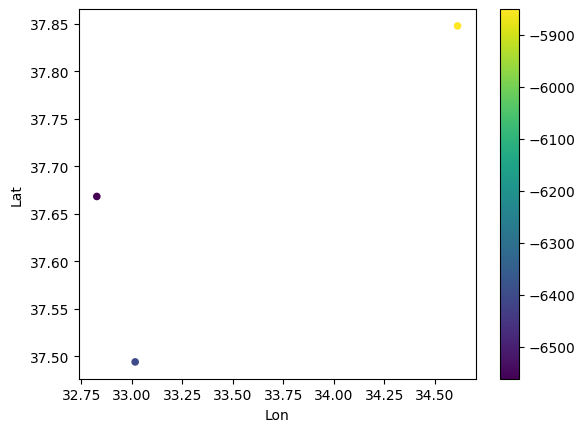

In [25]:
# Delete sites with very few bones and plot
final_df_horse = final_df_horse.drop(final_df_horse[final_df_horse['Date']['count'] < 100].index)
final_df_horse.plot.scatter(x='Lon', y='Lat', c=final_df_horse['Date']['mean'], colormap='viridis')

# Note our plot sites fall in different locations compared to when we did this with cows because the scale is zoomed-in (see axes)

### Exercise 2
We might want to see if these Neolithic cultures are treating animals differently. Look at the top 10 most common bones for cows, horses, and sheep/goats (including the "Ovis" entries - this is the genus name).

Are there any differences? How might you explain any differences?

In [26]:
# This is super simple. We can just use the counter on the relevant column:
Counter(df_cow['Has anatomical identification [Label]'].tolist())

Counter({'mandible': 1339,
         'proximal phalanx': 1119,
         'tooth of lower jaw': 904,
         'horn': 785,
         'middle phalanx': 777,
         'innominate bone': 702,
         'scapula': 688,
         'radius bone': 568,
         'skull': 544,
         'humerus': 525,
         'tibia': 511,
         'incisor tooth': 479,
         'femur': 468,
         'tooth of upper jaw': 465,
         'distal phalanx': 455,
         'rib': 450,
         'ulna': 410,
         'cranium': 371,
         'maxilla': 370,
         'fused metacarpal bones 3 and 4': 354,
         'fused metatarsal bones 3 and 4': 350,
         'calcaneus': 318,
         'sesamoid bone': 286,
         'talus': 284,
         'thoracic vertebra': 246,
         'metapodium bone': 220,
         'lumbar vertebra': 196,
         'carpal bone': 191,
         'cervical vertebra': 152,
         'tarsal bone': 136,
         'cervical vertebra 1': 122,
         'triquetral': 90,
         'cervical vertebra 2': 82,
    

In [27]:
# We do the same thing for horses
Counter(df_horse['Has anatomical identification [Label]'].tolist())

Counter({'incisor tooth': 382,
         'proximal phalanx': 288,
         'tooth of lower jaw': 260,
         'tooth of upper jaw': 228,
         'metapodium bone': 192,
         'middle phalanx': 189,
         'radius bone': 178,
         'innominate bone': 163,
         'tibia': 158,
         'scapula': 148,
         'distal phalanx': 118,
         'talus': 104,
         'ulna': 95,
         'humerus': 90,
         'femur': 83,
         'calcaneus': 82,
         'metacarpal bone of digit 3': 75,
         'mandible': 75,
         'sesamoid bone': 65,
         'metatarsal bone of digit 3': 59,
         'skull': 48,
         'scaphoid': 43,
         'lunate': 30,
         'distal carpal bone 3': 30,
         'tarsal bone': 25,
         'cervical vertebra 2': 24,
         'distal tarsal bone 3': 23,
         'cranium': 22,
         'navicular bone of pes': 17,
         'cervical vertebra 1': 17,
         'triquetral': 17,
         'metacarpal bone of digit 2': 16,
         'carpal bone':

In [28]:
# We could also do the same thing for Ovis, but I'm lazy. From above we see that potentially skulls are more prominent for cow bones than horse bones
# This may indicate cows and horses had different treatment within these cultures
# But to confirm this it would be necessary to study them as a percentage of the total bone finds

### Exercise 3
We previously dropped the column "Has physiological sex determination [Source]" because it was 85.6% NaN values. But let's now rerun the cells without removing it and look only at the rows which have an entry (the rows which are NOT NaN - you can do this with the "dropna" method).

Here we have information on whether the animal was young or old, and male or female.

Tidy things up a bit by renaming some of the row labels using the dictionary provided in the next cell. Then again remove all NaN values with dropna. Now you only have 3 classes: Male, Female, and Young. Again study the cows, horses, and sheep/goats/ovis, but this time don't group by city (just consider all sites as one Neolithic culture). Do you notice any differences in sex/age distributions? What might this tell us?

If there are enough data for any of the sites (at least 100 rows), then look for differences at the site-level.

In [29]:
# This one is a bit trickier. We need to first actually keep the "Has physiological sex determination" column, which we do by making a new DataFrame called df_raw_with_sex
# This is done way high up when we are deciding which columns to drop. We now use it here.
# Note: we also could have simply saved the column seperately and rejoined it to the df_raw dataframe here.

df_raw_with_sex = df_raw_with_sex.dropna()

# This dictionary contains key value pairs in which the keys are the current entries in the "Has physiological sex determination [Source]" column and the values either Male, Female, Young, or None
simplified_labels = {"Possibly male":"Male", "Possibly female":"Female", "maybe female?":"Female", "maybe male?": "Male", "female":"Female", "male":"Male", "Intermediate": None, "Unidientified": None, "unidentified":"None", "possibly female":"Female", "possibly male":"Male", "young male?":"Young", "Nonidentified":None, "Not applicable":None, "castrate":None, "Not determined":None, "Male?":"Male", "Male?":"Male", "Female?":"Female", "probably male":"Male", "probably female":"Female", "Female ?":"Female", "?":None, 'Indeterminate':None, "unknown":None}

# The best way to replace the columns is with a for loop like this:
for label in simplified_labels.keys():
    df_raw_with_sex.loc[df_raw_with_sex['Has physiological sex determination [Source]'] == label, 'Has physiological sex determination [Source]'] = simplified_labels[label]


In [ ]:
# Now all that's left is to select for cows and check the sex column using Counter

df_raw_with_sex.loc[df_raw_with_sex['Animal'] == 'Bos taurus Linnaeus, 1758', 'Animal'] = 'Bos'
df_raw_with_sex.loc[df_raw_with_sex['Animal'] == 'Bos primigenius', 'Animal'] = 'Bos'
df_cow_with_sex = df_raw_with_sex[df_raw_with_sex['Animal'] == 'Bos']
df_cow_with_sex = df_cow_with_sex.drop(columns=['Animal'])

Counter(df_cow_with_sex['Has physiological sex determination [Source]'].tolist())

Counter({None: 113, 'Male': 3, 'Female': 2})

In [ ]:
# We see that, unfortunately, only 5 bones have a sex attribute.
# This isn't nearly enough to see anything meaningful

In [ ]:
# Just for fun, let's see which animals have the most sex labels
Counter(df_raw_with_sex[df_raw_with_sex['Has physiological sex determination [Source]'] != None]['Animal'].tolist())

Counter({'Sheep/goat': 589,
         'Ovis': 306,
         'Mammalia': 167,
         'Bos': 118,
         'Artiodactyla': 116,
         'Equidae; Equus': 66,
         'Vulpes vulpes (Linnaeus, 1758); Vulpes': 49,
         'Capra': 31,
         'Homo sapiens Linnaeus, 1758': 27,
         'Cervidae': 24,
         'Sus': 19,
         'Lepus': 14,
         'Carnivora': 12,
         'Cervus elaphus Linnaeus, 1758': 6,
         'Equidae': 3,
         'Dama dama (Linnaeus, 1758)': 1,
         'Gallus gallus (Linnaeus, 1758)': 1,
         'Capreolus': 1,
         'Ovis aries Linnaeus, 1758': 1,
         'Sus scrofa domesticus; Sus': 1,
         'Aves': 1,
         'Rattus; Rodentia': 1,
         'Aves; Ciconia ciconia (Linnaeus, 1758)': 1})

In [ ]:
# It's mainly sheep/goat and Ovis (which is the sheep genus)
# Let's rename it

df_raw_with_sex.loc[df_raw_with_sex['Animal'] == 'Sheep/goat', 'Animal'] = 'Ovis'
df_sheep_with_sex = df_raw_with_sex[df_raw_with_sex['Animal'] == 'Ovis']

In [ ]:
# And lastly, check the sex counter
Counter(df_sheep_with_sex['Has physiological sex determination [Source]'].tolist())

Counter({None: 547, 'Female': 217, 'Male': 131})

In [ ]:
# So mainly female sheep were being kept.
# Nice to have a satisfactory output here!